# Extraction des données de vols sur [Google Flight ](https://www.google.com/flights?hl=fr&gl=fr)  grâce à  Selenium

> Dans ce projet, nous allons utiliser l'outil de navigation automatique **Selenium** pour interagir avec le navigateur chrome afin d'obliger le serveur à nous fournir les informations d'intérêt sur les vols d'avion : prix, escales, compagnies ... Une fois ces informations affichées, nous allons passer à **BeautifulSoup** qui est une librairie assez efficiente pour analyser et récupérer les données des pages HTML/XML .

Dans ce tutoriel vous allez apprendre :
* A lancer un navigateur automatisé
* A naviguer sur le Web de façon automatisée
* A cliquer & remplir les formulaires de façon automatisée
* A extraire les données d'une page Web

# 1. Installation de selenium

Pour pouvoir utiliser l'outil de navigation automatique **selenium**, vous devez l'installer. Cela peut se faire soit avec le gestionnaire de paquets **pip** soit avec  **conda**.

In [74]:
# Décommentez et exécutez le code ci-dessous si selenium n'est pa encore installé
#! pip install selenium
#! conda install selenium

Si votre installation de Selenium a réussi, il ne vous manque plus qu'un seul composant essentiel pour pouvoir passer à la navigation automatique : le **driver** . Le **driver** est le **pilote** qui permet à Selenium de lancer et manipuler le navigateur. Si vous êtes sur Chrome, vous [pouvez télécharger le pilote chromium à cette adresse](https://chromedriver.chromium.org/downloads), pour Firefox, [allez plutôt à cette adresse](https://github.com/mozilla/geckodriver/releases). <font color="red">Veillez à choisir une version de pilote qui correspond à la version de votre navigateur. Autrement Selenium ne marchera pas !</font>

# 2. Importation des librairies

Nous importons ici, les quelques librairies que nous allons utiliser dans ce tutoriel.

In [75]:
from selenium import  webdriver
import time # Pour pouvoir utiliser la fonction sleep
import re # Expression regulière
from bs4 import BeautifulSoup # Pour parser du code HTML

# 3. Lancer le navigateur automatique

Pour lancer le navigateur automatique, il vous faut connaître le chemin qui pointe vers le driver précédemment téléchargé. Pour moi, le driver se trouvait à l'adresse "**C:/Users/NKA/Downloads/chromedriver.exe**". Ca peut être différent pour vous, chercher le bon chemin ! Et surtout, si le fichier téléchargé est au format **.zip**, n'oubliez pas de le "dézipper" ! 

In [76]:
driver_path = "C:/Users/NKA/Downloads/chromedriver.exe" # Mettez le bon chemin sur votre PC ici

Pour lancer le navigateur **Chrome**, on passe à la fonction <font color="blue">webdriver.Chrome</font> le chemin vers le driver de Chrome. De même, pour lancer le navigateur **Firefox**, on passe à la fonction <font color="blue">webdriver.Firefox</font> le chemin vers le driver de Firefox.

In [4]:
# Créer un navigateur
driver = webdriver.Chrome(executable_path = driver_path)
# driver = webdriver.Firefox(executable_path= driver_path) # Décommentez cette ligne si vous êtes sur Firefox

# 4. Naviguer vers un site Web

Si vous avez bien observé, le navigateur précédemment lancé n'est allé sur aucune page web, c'est pour cela que vous ne voyez qu'une page blanche. Pour visiter une page quelconque, on appelle la fonction <font color="blue">driver.get</font> en lui passant l'**URL** de la page.

In [5]:
driver.get("https://www.google.com/flights?hl=fr&gl=fr") # Visiter le site google flight

Après avoir exécuté le code ci-dessus, regardez à nouveau votre navigateur automatique. Vous verrez qu'il est allé sur la page [google flight](https://www.google.com/flights?hl=fr&gl=fr). On est bon ! C'est comme cela que nous pouvons visiter n'importe quelle page !

# 5. Remplir le point de départ

Avez-vous été sur le site google flight ? On a aucun vol pour le moment. Ceci est normal puisque nous n'avons saisi aucun départ ni destination. Pour peremettre à google de nous afficher les prix, nous allons devoir saisir les points de départ et d'arrivée, comme ferait un vrai humain. Comment peut-on faire cela ? Suivez-moi !

## 5.1. Sélectionner la zone de saisie

Pour remplir le point de départ, on commence par chercher le **sélecteur css** du point de départ. Si vous aviez suivi [mon cours sur les sélecteurs css](https://neroksi.github.io/scraping/chap3.html), ces derniers ne devraient plus avoir de secrets pour vous. Si vous n'avez pas suivi ce cours, je vous conseille d'aller jeter un coup d'oeil et de regarder aussi [cette page qui résume bien les sélecteurs css](https://www.w3schools.com/cssref/css_selectors.asp). Ci-dessous, le sélecteur que moi j'ai trouvé :

In [77]:
origin_airport_css = "div[data-flt-ve='origin_airport'][class*='flt-input']"

Vous pouvez copier ce sélecteur et aller sur le site [google flight](https://www.google.com/flights?hl=fr&gl=fr). Faites maintenant "**CTRL + SHIFT + I**", faites encore **CTRL + F** et collez (**CTRL + C**) votre sélecteur. Vous verrez la zone de saisie de point de départ est bien coloriée en bleu, c'est que votre sélecteur est bon.

Une fois votre sélecteur en main, il suffit d'appeler la fonction <font color="blue">driver.find_element_by_css_selector</font> pour sélectionner l'**élément HTML** qui caractérise la zone de saisie du point de départ. 

In [78]:
origin_airport = driver.find_element_by_css_selector(css_selector= origin_airport_css)
print(origin_airport)

<selenium.webdriver.remote.webelement.WebElement (session="8c04706a8e151ecca256defcf9ff85e9", element="6937046f-48c1-4f15-bd14-07246650a3f5")>


Vous avez vu, quand on "print" un **élément  Web**, Selenium n'affiche rien d'intéressant à part de longues chaînes de caractères bizarroïdes qui constituent en fait la modélisation interne de l'élément dans Selenium. On va devoir trouver un autre moyen de regarder à l'intérieur d'un élément HTML.

In [79]:
origin_airport.get_attribute("outerHTML") # Pour vérifier visuellement

'<div data-flt-ve="origin_airport" jstcache="6990" role="presentation" jsaction="jsl._;f_f:jsl._;ica_bc:jsl._;keydown:jsl._" class="flt-input gws-flights-form__input-container gws-flights__flex-box gws-flights-form__airport-input gws-flights-form__swapper-right" jsan="0.data-flt-ve,22.jsaction,t-ch-jmKqQoDY,7.flt-input,7.gws-flights-form__input-container,7.gws-flights__flex-box,7.gws-flights-form__airport-input,7.gws-flights-form__swapper-right,0.role,21.jssc"><div jstcache="6723" jscontroller="pSNSIe" jsaction="rcuQ6b:npT2md" class="gws-flights-widgets-inputcapturearea__capture-area-wrapper"><span jsname="bOjMyf" aria-live="polite" jstcache="6657" style="display:none" jsvs="&quot;bOjMyf&quot;;" jsan="0.jsname,5.display,0.aria-live,t-uU8ghUBFeaU" id="flt-ica-5"> <span jstcache="6756">D\'où partez-vous&nbsp;?</span> <jsl jstcache="6757"><span><span>Paris</span></span></jsl> </span><textarea jsname="LlUqIb" role="textbox" tabindex="0" jstcache="6658" jsaction="keyup:dbqUTd;focus:h06R8;bl

Vous conviendrez avec moi que l'affichage ci-dessus est nettement plus parlant ! En effet, c'est le code HTML de l'élément. Ce code est exactement le même que vous verrez si vous faites **Clic droit + Inspecter**  sur l'élément. Ainsi, on peut vérifier visuellement si l'élément sélectionné est bien celui recherché.

## 5.2. Cliquer sur la zone de saisie

Jusqu'ici, nous avons sélectionné la zone de saisie mais google ne nous a pas encore donné la main pour saisir notre point de départ. Pour le faire, il va falloir cliquer sur la zone de saisie afin de faire apparaître le curseur **clignotant**. C'est d'ailleurs ce que ferait un vrai humain aussi!

In [9]:
origin_airport.click() # Pour cliquer et faire apparaître le formulaire 

## 5.3. Saisir le point de départ

Maintenant que Google nous a donné la main pour saisir le point de départ (si vous regardez vous verrez un curseur clignotant), il nous faut trouver à  nouveau le sélecteur qui caractérise la nouvelle zone de saisie à curseur. Moi j'ai trouvé le *sélecteur css* ci-dessous :

In [11]:
zone_clignotant_css = "input[placeholder*='partez-vous']" # Veuillez voir le chapitre 3 pour comprendre ce CSS

In [12]:
origin_airport2 = driver.find_element_by_css_selector(zone_clignotant_css)

une fois la zone clignotant sélectionnée, on peut saisir le point de départ en appelant la fonction <font color="blue">send_keys</font> . Mais bien avant, on s'assure que la zone de saisie soit bien vide en la nettoyant  avec la fonction <font color="blue">clear</font>. 

In [13]:
origin_airport2.clear() # vider la zone de saisie
origin_airport2.send_keys("Paris") # Remplir la zone de saisie
time.sleep(3)

## 5.4. Validation du premier aéroport de la liste de proposition

Si vous regardez le navigateur automatique à  nouveau, la zone de saisie a bien reçu la chaîne de caractère "**Paris**" qui est notre point de départ. Ensuite, Google nous propose la liste des aéroports qui correspondent plus ou moins à ce que nous avons saisi. Nous allons nous contenter de sélectionner le premier aéroport de cette liste. C'est souvent le plus pertinent d'ailleurs.

In [14]:
first_origin_airport = driver.find_element_by_css_selector(
                                        ".fsapp-option-content .fsapp-option-city-name")
first_origin_airport.click() # On clique pour valider le 1er aéroport de la liste

# 6. Remplir le point d'arrivée

Cette partie ressemble beaucoup à ce qui a été fait dans la partie précédente. Nous serons alors assez bref.

## 6.1. Sélectionner la zone de saisie

In [15]:
destination_airport = driver.find_element_by_css_selector(
    "div[data-flt-ve='destination_airport'][class*='flt-input']")

## 6.2. Cliquer sur la zone de saisie

In [16]:
destination_airport.click()

## 6.3. Saisir le point d'arrivée

In [17]:
destination_airport2 = driver.find_element_by_css_selector(
    "input[placeholder*='allez-vous']")

In [18]:
destination_airport2.clear() # vider la zone de saisie
destination_airport2.send_keys("New York")
time.sleep(3)

## 6.4. Validation du premier aéroport de la liste de proposition

In [19]:
first_destination_airport = driver.find_element_by_css_selector(
                                ".fsapp-option-content .fsapp-option-city-name")
first_destination_airport.click() # On clique pour valider le 1er aéroport de la liste

# 7. Lancer la rechercher

Maintenant que les informations obligatoires ont été remplies, nous allons pouvoir lancer la recherche de vols. Les dates, la classe et le nombre de passager seront laissés à leurs valeurs par défaut pour le moment.

In [20]:
search_button = driver.find_element_by_css_selector("floating-action-button.gws-flights-form__search-button")

In [21]:
search_button.click() # On clique pour lancer la recherche
time.sleep(5)

# 8. Dérouler la banderole des résultats

Voyez-vous comment google a limité le nombre de résultats ? Il y aune bannière un peu en bas sur laquelle il faut cliquer pour afficher le reste des résultats. Nous allons le faire !

In [22]:
expand_button = driver.find_element_by_css_selector(".gws-flights-results__dominated-toggle")

In [23]:
expand_button.click() # Cliquer pour dérouler la banderole
time.sleep(2)

> Boom boom  boom !!! Nous avons maintenant tous les prix des vols de Paris à New York. Nous pouvons scraper ces informations soit avec Selenium soit avec BeautifulSoup qui est plus rapide. Mais bien avant, nous allons encapsuler tout le travail réalisé jusqu'ici dans de petites et jolies fonctions :) .

# 9. Tout encapsuler dans de petites fonctions

In [24]:
def remplir_depart(depart):
    css_origin_airport = "div[data-flt-ve='origin_airport'][class*='flt-input']"
    origin_airport = driver.find_element_by_css_selector(css_origin_airport)
    origin_airport.click() # Pour cliquer et faire apparaître le formulaire 
    time.sleep(1)
    
    css_origin_airport2 = "input[placeholder*='partez-vous']"
    origin_airport2 = driver.find_element_by_css_selector(
                                            css_origin_airport2)
    origin_airport2.clear()
    origin_airport2.send_keys(depart)
    time.sleep(3)

    first_origin_airport_css = ".fsapp-option-content .fsapp-option-city-name"
    first_origin_airport = driver.find_element_by_css_selector(first_origin_airport_css)
    first_origin_airport.click()

In [25]:
def remplir_arrivee(arrivee):
    css_destination_airport = "div[data-flt-ve='destination_airport'][class*='flt-input']"
    destination_airport = driver.find_element_by_css_selector(
        css_destination_airport)
    destination_airport.click() # Pour cliquer et faire apparaître le formulaire 
    time.sleep(1)
    
    css_destination_airport2 = "input[placeholder*='allez-vous']"
    destination_airport2 = driver.find_element_by_css_selector(
                                            css_destination_airport2)
    destination_airport2.clear()
    destination_airport2.send_keys(arrivee)
    time.sleep(3)

    first_destination_airport_css = ".fsapp-option-content .fsapp-option-city-name"
    first_destination_airport = driver.find_element_by_css_selector(first_destination_airport_css)
    first_destination_airport.click()

In [26]:
def rechercher():
    search_button = driver.find_element_by_css_selector(
            ".gws-flights-form__search-button-wrapper " 
        + "floating-action-button.gws-flights-form__search-button")
    search_button.click()
    
def derouler():
    expand_button = driver.find_element_by_css_selector(
                        ".gws-flights-results__dominated-toggle")
    expand_button.click()

In [27]:
def prix_vol(depart = "Paris", arrivee = "Abidjan"):
    driver.get("https://www.google.com/flights?hl=fr&gl=fr")
    time.sleep(1)
    remplir_depart(depart)
    time.sleep(1)
    remplir_arrivee(arrivee)
    rechercher()
    time.sleep(5)
    derouler()
    time.sleep(2)

In [28]:
# On test le tout !
prix_vol("Paris", "New York")

# 10. Scrapper les informations

In [29]:
# Recupérer le code source de la page
page_source = driver.page_source

In [30]:
# Créer un objet bs
soup = BeautifulSoup(page_source)

## 10.1. Sélection  de toutes les lignes de la table

In [31]:
rows = soup.select( 
 ".gws-flights-results__result-list .gws-flights-results__result-item")

In [32]:
row = rows[0] # Prendre une ligne quelconque

## 10.2. Block N° 2 : Temps de vol & compagnie

In [33]:
time_block = row.select_one(".gws-flights-results__itinerary-times")

In [34]:
time_block

<div class="gws-flights-results__itinerary-times gws-flights__ellipsize" data-animation-slideout=""> <div class="gws-flights-results__times-row"> <div class="gws-flights-results__times flt-subhead1"><span> <span jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb" jscontroller="lLN5lc" jsdata="Dij6Dd;;170"> <span>06:20</span> </span> </span> – <span> <span jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb" jscontroller="lLN5lc" jsdata="Dij6Dd;;171"> <span>14:15</span> </span> </span> </div> </div> <div class="gws-flights-results__carriers gws-flights__ellipsize gws-flights__flex-box gws-flights__align-center flt-caption"> <span class="gws-flights__ellipsize"><span><span>Alitalia</span></span></span> <span class="gws-flights-results__airline-extra-info gws-flights__ellipsize"> <span> <div class="gws-flights__separator"></div> <span><span><span>Delta</span></span></span> </span> <span class="gws-flights-results__disclosure"></span> </span> </div> </div>

In [35]:
times = time_block.select(
    ".gws-flights-results__times [jscontroller] span:not([class])")
len(times)

2

In [36]:
times

[<span>06:20</span>, <span>14:15</span>]

In [37]:
offset_days = time_block.select_one(".gws-flights__offset-days")
offset_days

In [38]:
company = time_block.select_one(
    ".gws-flights-results__carriers .gws-flights__ellipsize")
company

<span class="gws-flights__ellipsize"><span><span>Alitalia</span></span></span>

In [39]:
extra_infos = time_block.select_one(
    ".gws-flights-results__airline-extra-info.gws-flights__ellipsize")
extra_infos.text

'   Delta   '

In [40]:
time_block_values = {"departure": times[0].text,
                     "arrival":  times[1].text,
    "offset_days": offset_days.text if offset_days else None,
                     "company":  company.text,
                     "extra_infos":  extra_infos.text,
                    }
time_block_values

{'departure': '06:20',
 'arrival': '14:15',
 'offset_days': None,
 'company': 'Alitalia',
 'extra_infos': '   Delta   '}

In [41]:
def get_time_block(row) :
    time_block = row.select_one(".gws-flights-results__itinerary-times")
    times = time_block.select(
        ".gws-flights-results__times [jscontroller] span:not([class])")
    offset_days = time_block.select_one(".gws-flights__offset-days")
    company = time_block.select_one(
            ".gws-flights-results__carriers .gws-flights__ellipsize")
    
    extra_infos = time_block.select_one(
    ".gws-flights-results__airline-extra-info.gws-flights__ellipsize")
    
    time_block_values = {
        "departure": times[0].text,
        "arrival":  times[1].text,
        "offset_days": offset_days.text if offset_days else None,
        "company":  company.text,
        "extra_infos":  extra_infos.text,
         }
    return time_block_values

In [42]:
get_time_block(row)

{'departure': '06:20',
 'arrival': '14:15',
 'offset_days': None,
 'company': 'Alitalia',
 'extra_infos': '   Delta   '}

## 10.3. Block 3 : les durées

In [43]:
duration_block = row.select_one(
    ".gws-flights-results__itinerary-duration")
duration_block

<div class="gws-flights-results__itinerary-duration gws-flights__ellipsize" data-animation-fadeout=""> <div class="gws-flights-results__duration flt-subhead1Normal">13 h 55 min</div> <div> <div class="gws-flights-results__airports flt-caption"> <span data-airportcode="CDG" jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb" jscontroller="U6dg7d">CDG</span>–<span data-airportcode="JFK" jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb" jscontroller="U6dg7d">JFK</span> </div> </div> </div>

In [44]:
flight_duration = duration_block.select_one(
    ".gws-flights-results__duration").text.replace("\xa0", "")
flight_duration

'13h55min'

In [45]:
airports = duration_block.select(
    ".gws-flights-results__airports span[data-airportcode]")
departure = airports[0].text
arrival = airports[1].text
departure, arrival

('CDG', 'JFK')

In [46]:
def get_duration_block(row):
    duration_block = row.select_one(
    ".gws-flights-results__itinerary-duration")
    flight_duration = duration_block.select_one(
    ".gws-flights-results__duration").text.replace("\xa0", "")
    return {"flight_duration": flight_duration}

In [47]:
get_duration_block(row)

{'flight_duration': '13h55min'}

## 10.4. Block N° 4 : escales

In [48]:
stops_block = row.select_one(".gws-flights-results__itinerary-stops")
stops_block

<div class="gws-flights-results__itinerary-stops gws-flights__ellipsize" data-animation-fadeout=""> <div> <div class="gws-flights-results__stops flt-subhead1Normal"> <div><span>1 escale</span></div> </div> </div> <div class="gws-flights-results__layover-time flt-caption"> <span>2 h 0 min</span> <span><span data-airportcode="FCO" jscontroller="U6dg7d"><span jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb">FCO</span></span></span> </div> </div>

In [49]:
nb_stops = stops_block.select_one(
    ".gws-flights-results__stops span").text
nb_stops = nb_stops.split("\xa0")[0]
nb_stops

'1'

In [50]:
details  = stops_block.select_one(
    ".gws-flights-results__layover-time").text
# duration = duration.split("\xa0")
details

' 2\xa0h\xa00\xa0min FCO '

In [51]:
def get_stops_block(row):
    stops_block = row.select_one(".gws-flights-results__itinerary-stops")
    nb_stops = stops_block.select_one(".gws-flights-results__stops span").text
    nb_stops = nb_stops.split("\xa0")[0]
    
    details  = stops_block.select_one(
                    ".gws-flights-results__layover-time span")
    details =  details.text if details else ""
    
    return {"nb_stops":nb_stops, "stops_details": details }

In [52]:
get_stops_block(rows[0])

{'nb_stops': '1', 'stops_details': '2\xa0h\xa00\xa0min'}

## 10.5. Block N° 5 : les prix

In [53]:
price_block =  row.select_one(".gws-flights-results__itinerary-price")
price_block

<div class="gws-flights-results__itinerary-price" jscontroller="OM4EZb"> <div class="flt-subhead1 gws-flights-results__price gws-flights-results__cheapest-price">      313 €   </div> <div class="gws-flights-results__price-annotation flt-caption">aller-retour</div> </div>

In [54]:
prices = price_block.select_one(
    ".gws-flights-results__price").text.strip()#.split("\xa0")
prices  = re.sub("[^\w€]", "", prices)
prices

'313€'

In [55]:
def get_price_block(row):
    price_block =  row.select_one(".gws-flights-results__itinerary-price")
    price = price_block.select_one(
    ".gws-flights-results__price")
    price = price.text if price else ""
    price  = re.sub("[^\w€]", "", price)
    
    price_annotation  = price_block.select_one(
        ".gws-flights-results__price-annotation")
    price_annotation = price_annotation.text if price_annotation else ""
    
    return {"price": price, "price_annotation": price_annotation}

In [56]:
get_price_block(row)

{'price': '313€', 'price_annotation': 'aller-retour'}

In [57]:
# dict1 = {"a": 1, "b": 2}
# print("dict1 avant:", dict1)

# dict2 = {"c": 3, "d": 4, "e": 5}
# print("dict2 avant: ", dict2)

# dict1.update(dict2)

# print("dict1 après:", dict1)
# print("dict2 après: ", dict2)

## 10.6. Obtenir toute une ligne

In [58]:
def get_row(row) :
    time_block =  get_time_block(row)
    stops_block = get_stops_block(row)
    price_block = get_price_block(row)
    duration_block = get_duration_block(row)
    
    row_values = time_block
    row_values.update(stops_block)
    row_values.update(price_block)
    row_values.update(duration_block)
    
    return row_values

In [59]:
get_row(row)

{'departure': '06:20',
 'arrival': '14:15',
 'offset_days': None,
 'company': 'Alitalia',
 'extra_infos': '   Delta   ',
 'nb_stops': '1',
 'stops_details': '2\xa0h\xa00\xa0min',
 'price': '313€',
 'price_annotation': 'aller-retour',
 'flight_duration': '13h55min'}

## 10.7. Obtenir toute la table

In [60]:
data = []
for row in rows:
    try :
        data.append(get_row(row))
    except Exception as e:
        print(e)

In [61]:
len(rows), len(data)

(300, 300)

In [62]:
data[0]

{'departure': '06:20',
 'arrival': '14:15',
 'offset_days': None,
 'company': 'Alitalia',
 'extra_infos': '   Delta   ',
 'nb_stops': '1',
 'stops_details': '2\xa0h\xa00\xa0min',
 'price': '313€',
 'price_annotation': 'aller-retour',
 'flight_duration': '13h55min'}

## 10.8. Tout transformer en dataframe

In [63]:
import pandas as pd
%matplotlib inline

In [64]:
df =  pd.DataFrame(data)

df.head(10)

,departure,arrival,offset_days,company,extra_infos,nb_stops,stops_details,price,price_annotation,flight_duration
0,06:20,14:15,None,Alitalia,Delta,1,2 h 0 min,313€,aller-retour,13h55min
1,15:40,21:29,None,"Air France, Delta",,1,2 h 24 min,317€,aller-retour,11h49min
2,18:05,20:30,None,Norwegian,,Sans escale,,368€,aller-retour,8h25min
3,19:20,21:55,None,Air France,Delta,Sans escale,,372€,aller-retour,8h35min
4,11:15,16:15,None,Lufthansa,,1,1 h 5 min,381€,aller-retour,11h0min
5,12:40,19:30,None,"Air France, KLM",,1,3 h 10 min,309€,aller-retour,12h50min
6,07:30,16:38,None,"Air France, Delta",,1,4 h 25 min,310€,aller-retour,15h8min
7,06:20,18:30,None,Alitalia,,1,6 h 15 min,313€,aller-retour,18h10min
8,11:10,18:30,None,Alitalia,Delta,1,1 h 25 min,313€,aller-retour,13h20min
9,07:55,15:58,None,"Air France, Delta",,1,2 h 10 min,314€,aller-retour,14h3min


In [65]:
df["price_clean"] = pd.to_numeric(
            df["price"].str.replace("€", ""), errors= "ignore")
df.head()

,departure,arrival,offset_days,company,extra_infos,nb_stops,stops_details,price,price_annotation,flight_duration,price_clean
0,06:20,14:15,None,Alitalia,Delta,1,2 h 0 min,313€,aller-retour,13h55min,313
1,15:40,21:29,None,"Air France, Delta",,1,2 h 24 min,317€,aller-retour,11h49min,317
2,18:05,20:30,None,Norwegian,,Sans escale,,368€,aller-retour,8h25min,368
3,19:20,21:55,None,Air France,Delta,Sans escale,,372€,aller-retour,8h35min,372
4,11:15,16:15,None,Lufthansa,,1,1 h 5 min,381€,aller-retour,11h0min,381


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
departure           300 non-null object
arrival             300 non-null object
offset_days         65 non-null object
company             300 non-null object
extra_infos         300 non-null object
nb_stops            300 non-null object
stops_details       300 non-null object
price               300 non-null object
price_annotation    300 non-null object
flight_duration     300 non-null object
price_clean         300 non-null int64
dtypes: int64(1), object(10)
memory usage: 25.9+ KB


In [67]:
df.price_clean.min(), df.price_clean.max()

(309, 3457)

In [68]:
df[df.price_clean.isnull()]

,departure,arrival,offset_days,company,extra_infos,nb_stops,stops_details,price,price_annotation,flight_duration,price_clean


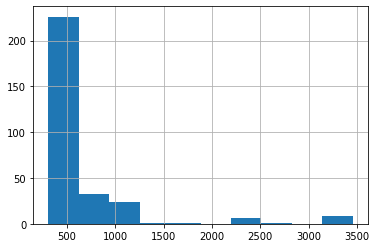

In [69]:
df.price_clean.hist()

## 10.9. Encpasuler l'ensemble du travail dans une fonction

In [70]:
def google_flight(depart = "Paris", arrivee = "Abidjan") :
    prix_vol(depart,arrivee)
    time.sleep(2)
    html =  driver.find_element_by_css_selector("html")
    page_source = html.get_attribute("outerHTML")
    
    soup = BeautifulSoup(page_source)
    
    rows = soup.select( ".gws-flights-results__result-list "+
                       ".gws-flights-results__result-item")
    
    data = []
    for row in rows:
        try :
            data.append(get_row(row))
        except Exception as e:
            print(e)
        
    df = pd.DataFrame(data)
    df["orgin_airport"] = depart
    df["destination_airport"] = arrivee
    
    return df

In [71]:
df = google_flight("Paris", "New York")
df.head(10)

,departure,arrival,offset_days,company,extra_infos,nb_stops,stops_details,price,price_annotation,flight_duration,orgin_airport,destination_airport
0,06:20,14:15,None,Alitalia,Delta,1,2 h 0 min,313€,aller-retour,13h55min,Paris,New York
1,15:40,21:29,None,"Air France, Delta",,1,2 h 24 min,317€,aller-retour,11h49min,Paris,New York
2,18:05,20:30,None,Norwegian,,Sans escale,,368€,aller-retour,8h25min,Paris,New York
3,19:20,21:55,None,Air France,Delta,Sans escale,,372€,aller-retour,8h35min,Paris,New York
4,11:15,16:15,None,Lufthansa,,1,1 h 5 min,381€,aller-retour,11h0min,Paris,New York
5,12:40,19:30,None,"Air France, KLM",,1,3 h 10 min,309€,aller-retour,12h50min,Paris,New York
6,07:30,16:38,None,"Air France, Delta",,1,4 h 25 min,310€,aller-retour,15h8min,Paris,New York
7,06:20,18:30,None,Alitalia,,1,6 h 15 min,313€,aller-retour,18h10min,Paris,New York
8,11:10,18:30,None,Alitalia,Delta,1,1 h 25 min,313€,aller-retour,13h20min,Paris,New York
9,07:55,15:58,None,"Air France, Delta",,1,2 h 10 min,314€,aller-retour,14h3min,Paris,New York


In [72]:
df.shape

(300, 12)

In [73]:
df.to_excel("paris_new_york.xlsx") # Sauvegarder les prix dans une feuille excel

# Conclusion

Dans ce tutoriel vous avez appris à :
* Lancer un navigateur automatisé
* Naviguer sur le Web de façon automatisée
* Cliquer & remplir les formulaires de façon automatisée
* Extraire les données d'une page Web